Problem Scenario: ‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.
 
Problem Objective: As a data scientist, you should perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.
 
Data Description:
The variables birth-year, education, income, and so on are related to the first 'P' or 'People' in the tabular data provided to the user. The amount spent on wine, fruits, gold, etc., is related to ‘Product’. The information pertinent to sales channels, like websites, stores, etc., is related to ‘Place’, and the fields which talk about promotions and results of different campaigns are related to ‘Promotion’.

In [299]:
# importing all the need libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


df = pd.read_csv("marketing_data.csv", index_col="ID")

df.head(20)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,...,5,2,0,0,0,0,0,1,0,SP
4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,...,7,6,1,0,0,0,0,1,0,GER
1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,...,3,5,0,0,0,0,0,0,0,SP
4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,...,9,4,0,0,0,0,0,0,0,US


In [300]:
df.describe()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3    Income              2216 non-null   object
 4   Kidhome              2240 non-null   int64 
 5   Teenhome             2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProds         2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  NumCatal

In [302]:
df.columns=df.columns.str.replace(" ","") # deleting all the empty spaces

In [303]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,...,11,4,0,0,0,0,0,0,0,US
5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,...,5,8,0,0,0,0,0,0,0,SP


In [304]:
df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').astype(float)  # deleting all the '$' and ',' to work on the income column
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [180]:
df.Dt_Customer

ID
1826      6/16/14
1         6/15/14
10476     5/13/14
1386      5/11/14
5371       4/8/14
           ...   
10142      3/7/13
5263      1/22/13
22        12/3/12
528      11/29/12
4070       9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

In [181]:
df.isna().sum() # showing the null values on each column

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [182]:
df["Income"]=df.groupby(['Marital_Status','Education'])['Income'].transform(lambda x:x.fillna(x.mean())) # filling all the null values on the specified columns by the average of each group

In [183]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [185]:
df["totalSpending"] = df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds # calculate the total spending
df["totalPurchases"] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases  # calculate the total purchases
df["totalChildern"] = df.Kidhome + df.Teenhome  # calculate the total num of Childern

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,NumOfChildren,totalSpending,totalPurchases,totalChildern
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,1,0,SP,0,1001,15,0
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,0,1,1,0,CA,0,113,18,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,US,1,117,11,1
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,0,AUS,2,1,4,2
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,0,0,0,1,0,SP,1,85,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,0,0,0,0,0,US,1,317,20,1
5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,0,SP,1,50,5,1
22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,0,0,0,0,0,SP,1,124,14,1


In [186]:
df["age"] = 2023 - df.Year_Birth # adding age columns

In [187]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,NumOfChildren,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,0,0,1,0,SP,0,1001,15,0,53
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,1,1,0,CA,0,113,18,0,62
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,US,1,117,11,1,65
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,AUS,2,1,4,2,56
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,0,0,1,0,SP,1,85,8,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,0,0,0,0,US,1,317,20,1,47
5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,SP,1,50,5,1,46
22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,0,0,0,0,SP,1,124,14,1,47


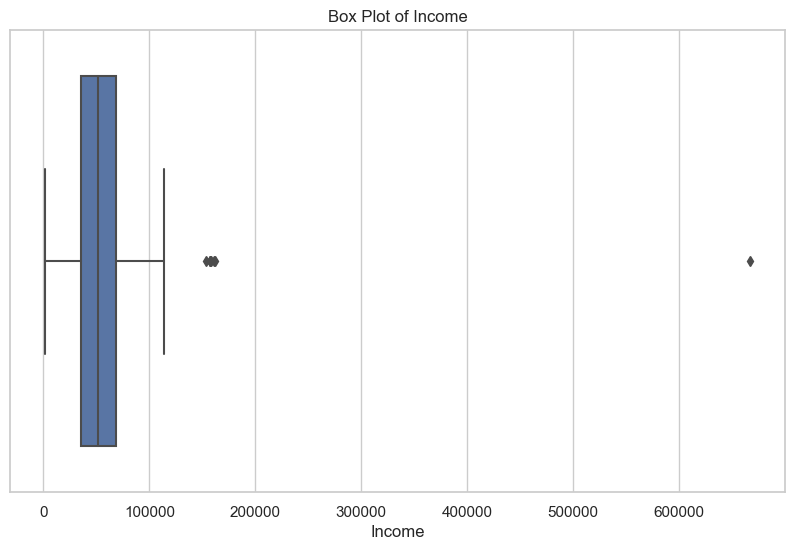

In [306]:
sns.set(style="whitegrid")    # showing the outliers
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="Income")
plt.title("Box Plot of Income")
plt.show()

In [307]:
df.loc[df.Income > 200000]  # showing the outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,...,3,6,0,0,0,0,0,0,0,SA


In [308]:
dropp = df[df.Income > 200000].index   # droping the outliers
df.drop(dropp, inplace = True)

df.loc[df.Income > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,


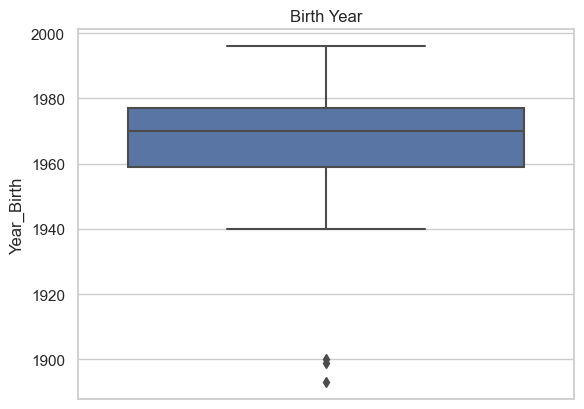

In [309]:
sns.boxplot(data=df, y='Year_Birth')             # showing the outliers
plt.title("Birth Year")
plt.show()

In [310]:
df.loc[df.Year_Birth < 1920]   # showing the outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,...,2,4,0,0,0,0,0,0,0,SA
1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,...,4,1,0,0,1,0,0,0,0,SP
7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,...,2,5,0,0,0,0,0,0,1,IND


In [311]:
dropp = df[df.Year_Birth < 1920].index   # droping the outliers
df.drop(dropp, inplace = True)

df.loc[df.Year_Birth < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,


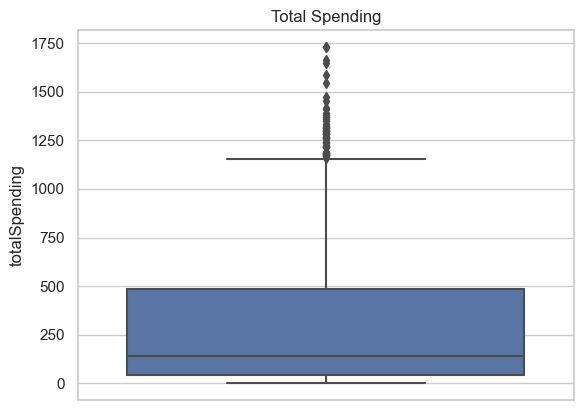

In [194]:
sns.boxplot(data=df, y='totalSpending')      # showing the outliers
plt.title("Total Spending")
plt.show()

In [195]:
df.loc[df.totalSpending > 1150]    # showing the outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,NumOfChildren,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
9264,1986,Graduation,Married,79529.000000,0,0,4/27/14,1,423,42,...,0,0,0,0,CA,0,1215,22,0,37
1619,1956,Graduation,Married,90369.000000,0,0,4/28/14,2,292,51,...,0,0,1,0,SP,0,1296,17,0,67
7233,1972,Graduation,Married,69209.000000,0,0,9/17/12,4,496,32,...,1,0,0,0,CA,0,1286,16,0,51
5331,1977,Graduation,Married,74985.000000,0,0,9/11/12,8,587,51,...,0,0,0,0,GER,0,1282,17,0,46
4931,1977,Graduation,Together,157146.000000,0,0,4/29/13,13,1,0,...,0,0,0,0,SA,0,1729,28,0,46
3698,1983,Graduation,Together,78687.000000,0,0,8/9/12,13,817,185,...,0,0,1,0,SP,0,1313,19,0,40
1577,1946,Graduation,Married,78569.000000,0,0,2/19/14,14,558,79,...,0,0,1,0,SP,0,1178,15,0,77
6072,1970,Master,Single,75345.000000,0,0,2/2/13,16,918,57,...,1,0,1,0,SP,0,1169,20,0,53
8643,1971,Graduation,Together,69930.000000,0,0,5/26/13,21,252,98,...,0,0,0,0,IND,0,1410,22,0,52


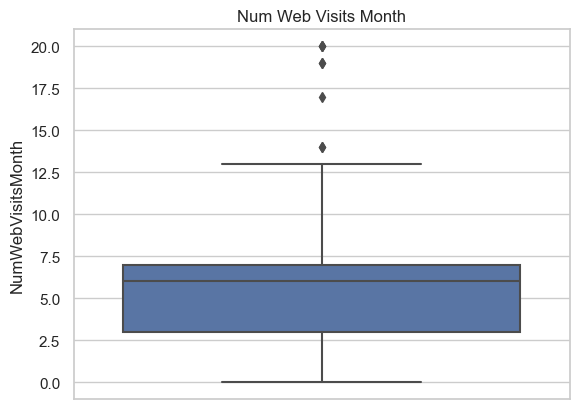

In [289]:
sns.boxplot(data=df, y='NumWebVisitsMonth')       # showing the outliers
plt.title("Num Web Visits Month") 
plt.show()

In [198]:
df.loc[df.NumWebVisitsMonth> 13]   

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,NumOfChildren,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
4246,1982,Master,Single,6560.0,0,0,12/12/13,2,67,11,...,0,0,0,0,SP,0,306,2,0,41
3955,1965,Graduation,Divorced,4861.0,0,0,6/22/14,20,2,1,...,0,0,0,0,SA,0,4,0,0,58
9931,1963,PhD,Married,4023.0,1,1,6/23/14,29,5,0,...,0,0,0,0,SP,2,4,15,2,60
11110,1973,Graduation,Single,3502.0,1,0,4/13/13,56,2,1,...,0,0,0,0,IND,1,3,0,1,50
10749,1991,Graduation,Single,8028.0,0,0,9/18/12,62,73,18,...,0,0,0,0,SP,0,105,16,0,32
6862,1971,Graduation,Divorced,1730.0,0,0,5/18/14,65,1,1,...,0,0,0,0,SP,0,7,15,0,52
5899,1950,PhD,Together,5648.0,1,1,3/13/14,68,28,0,...,0,0,0,0,US,2,21,2,2,73
4303,1957,PhD,Together,6835.0,0,1,12/8/12,76,107,2,...,0,0,0,0,CA,1,30,1,1,66


In [ ]:
dropp = df[df.NumWebVisitsMonth> 13].index   # droping the outliers
df.drop(dropp, inplace = True)

df.loc[df.NumWebVisitsMonth> 13]

In [ ]:
df.loc[df.NumWebVisitsMonth> 13] 

In [199]:
"""encode = {'Graduation': 1, 'PhD': 2, '2n Cycle': 3, 'Master': 4, 'Basic': 5}
df["Education"] = df["Education"].replace(encode)"""

'encode = {\'Graduation\': 1, \'PhD\': 2, \'2n Cycle\': 3, \'Master\': 4, \'Basic\': 5}\ndf["Education"] = df["Education"].replace(encode)'

In [203]:
pd.unique(df.Education) # knowing the unique values of education

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [204]:
enc = OrdinalEncoder()   # using the ordinal encoder for specificed columns
enc.fit(df[["Education", "Marital_Status"]])
df[["Education", "Marital_Status"]] = enc.transform(df[["Education", "Marital_Status"]])

In [205]:
ndf = pd.get_dummies(df, columns = ['Country'], prefix=['cou1'])  # using the get_dummies which is one hot encoder in pandas for specificed columns
ndf.replace({False: 0, True: 1}, inplace=True)
ndf

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,totalChildern,age,cou1_AUS,cou1_CA,cou1_GER,cou1_IND,cou1_ME,cou1_SA,cou1_SP,cou1_US
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,2.0,2.0,84835.0,0,0,6/16/14,0,189,104,...,0,53,0,0,0,0,0,0,1,0
1,1961,2.0,4.0,57091.0,0,0,6/15/14,0,464,5,...,0,62,0,1,0,0,0,0,0,0
10476,1958,2.0,3.0,67267.0,0,1,5/13/14,0,134,11,...,1,65,0,0,0,0,0,0,0,1
1386,1967,2.0,5.0,32474.0,1,1,5/11/14,0,10,0,...,2,56,1,0,0,0,0,0,0,0
5371,1989,2.0,4.0,21474.0,1,0,4/8/14,0,6,16,...,1,34,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,4.0,2.0,66476.0,0,1,3/7/13,99,372,18,...,1,47,0,0,0,0,0,0,0,1
5263,1977,0.0,3.0,31056.0,1,0,1/22/13,99,5,10,...,1,46,0,0,0,0,0,0,1,0
22,1976,2.0,2.0,46310.0,1,0,12/3/12,99,185,2,...,1,47,0,0,0,0,0,0,1,0


<Axes: >

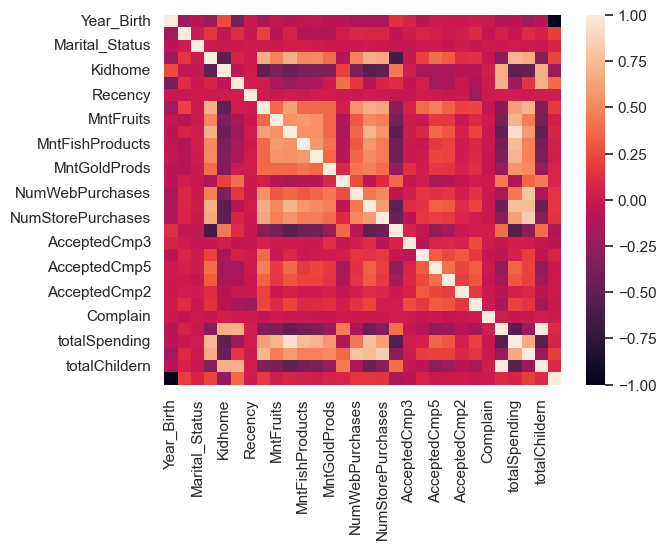

In [206]:
nc = df.select_dtypes(include=['number'])   # chossing only the columns which has number type

sns.heatmap(nc.corr())

In [207]:
t_stat, p_value = stats.ttest_ind(df[df['age'] >= 60]["NumStorePurchases"],   # experminet the hyposthisis 
                                 df[df['age'] > 60]["NumWebPurchases"],
                                 alternative='greater')

t_stat, p_value


(11.512870220991385, 1.1245340040803213e-29)

In [212]:
t_stat, p_value = stats.ttest_ind(df[df['totalChildern'] > 0]["NumStorePurchases"],     # experminet the hyposthisis 
                                 df[df['totalChildern'] > 0]["NumWebPurchases"],
                                 alternative="greater")

t_stat, p_value

(11.861748515189555, 4.3135379915687334e-32)

In [215]:
t_stat, p_value = stats.ttest_ind(df[df['Country'] == "US"]["totalPurchases"],     # experminet the hyposthisis 
                                 df[df['Country'] != "US"]["totalPurchases"],
                                 alternative="greater")

t_stat, p_value

(1.1641110457981514, 0.12225328632572995)

In [213]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,NumOfChildren,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,2.0,2.0,84835.0,0,0,6/16/14,0,189,104,...,0,0,1,0,SP,0,1001,15,0,53
1,1961,2.0,4.0,57091.0,0,0,6/15/14,0,464,5,...,0,1,1,0,CA,0,113,18,0,62
10476,1958,2.0,3.0,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,US,1,117,11,1,65
1386,1967,2.0,5.0,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,AUS,2,1,4,2,56
5371,1989,2.0,4.0,21474.0,1,0,4/8/14,0,6,16,...,0,0,1,0,SP,1,85,8,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,4.0,2.0,66476.0,0,1,3/7/13,99,372,18,...,0,0,0,0,US,1,317,20,1,47
5263,1977,0.0,3.0,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,SP,1,50,5,1,46
22,1976,2.0,2.0,46310.0,1,0,12/3/12,99,185,2,...,0,0,0,0,SP,1,124,14,1,47


In [224]:
total_rev = df.MntWines.sum(), df.MntFruits.sum(), df.MntMeatProducts.sum(), df.MntFishProducts.sum(), df.MntSweetProducts.sum(), df.MntGoldProds.sum() # assigning

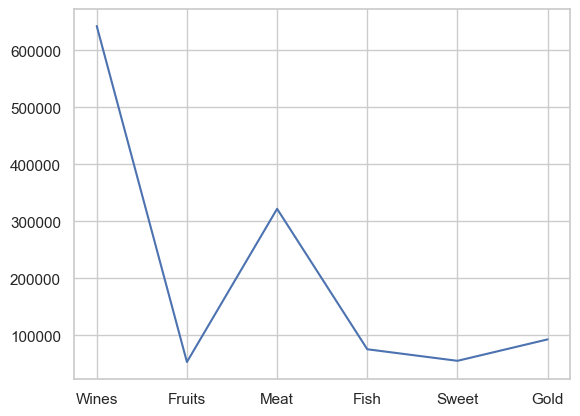

In [225]:
cate = ["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]    # ploting the total rev for each category
plt.plot(cate,total_rev)
plt.show()

In [237]:
df["age"].corr(df["AcceptedCmp5"])

-0.0032970912863757138

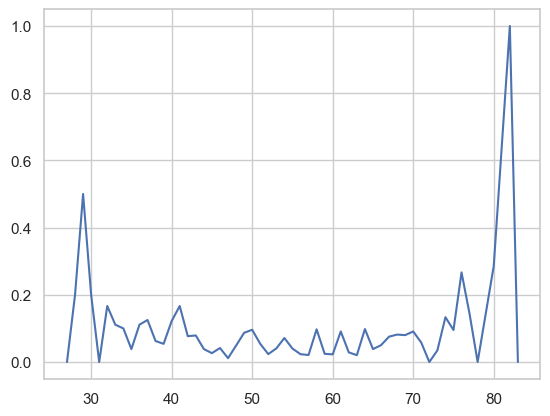

In [241]:
plt.plot(df.groupby("age")["AcceptedCmp5"].mean()) # showing the relation between the age and the last cmp5

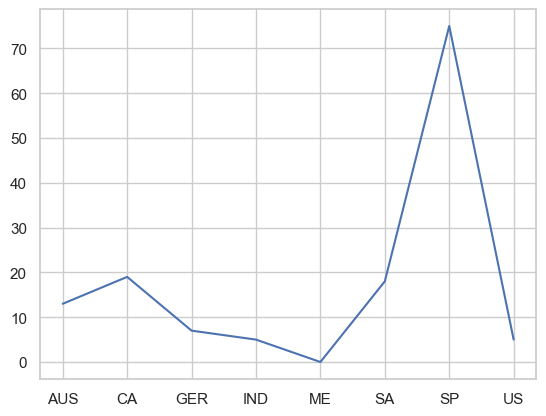

In [252]:
plt.plot(df.groupby("Country")["AcceptedCmp5"].sum())   # showing the relation between the country and the last cmp5

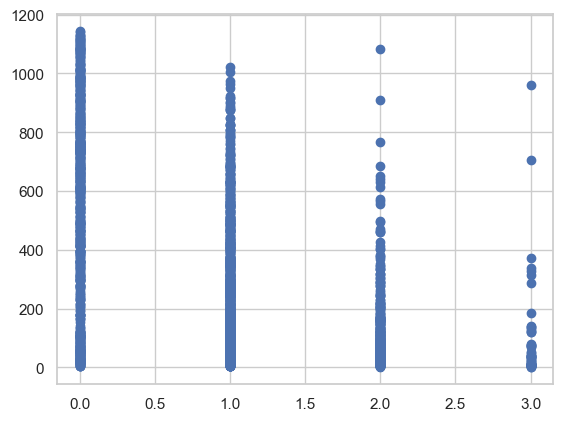

In [265]:
plt.scatter(df["totalChildern"],df["totalSpending"])    # showing the relation between the total childern for family and the total spending 

<BarContainer object of 4 artists>

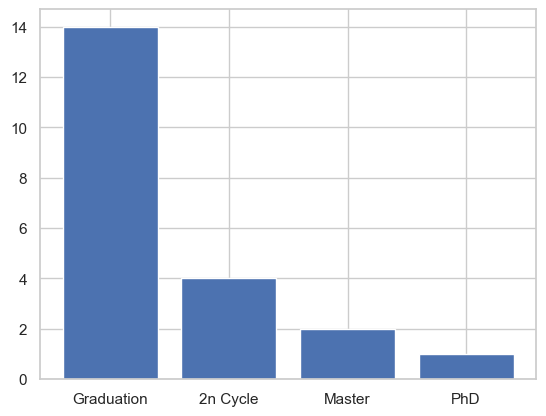

In [291]:
ecc = df[df['Complain'] == 1]["Education"].value_counts()    # showing the number of complain for each education level
plt.bar(ecc.index, ecc)